<a href="https://colab.research.google.com/github/Limontika/python_ML/blob/master/big_data_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ФИО, группа

##Лабораторная работа №4. Логистическая регрессия


Лабораторная работа состоит из двух частей. В первой части вам нужно реализовать логистическую регрессию и проверить, как она работает на синтетических данных. Во второй части вам нужно применить логистическую регрессию для решения задачи на реальных данных.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(7)

## 1. Логистическая регрессия на синтетических данных

Для генерации синтетических данных для задачи бинарной классификации можно воспользоваться функцией [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). Сгенерируем данные с двумя признаками (факторами), чтобы их было удобно изобразить на плоскости.

In [0]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=9)

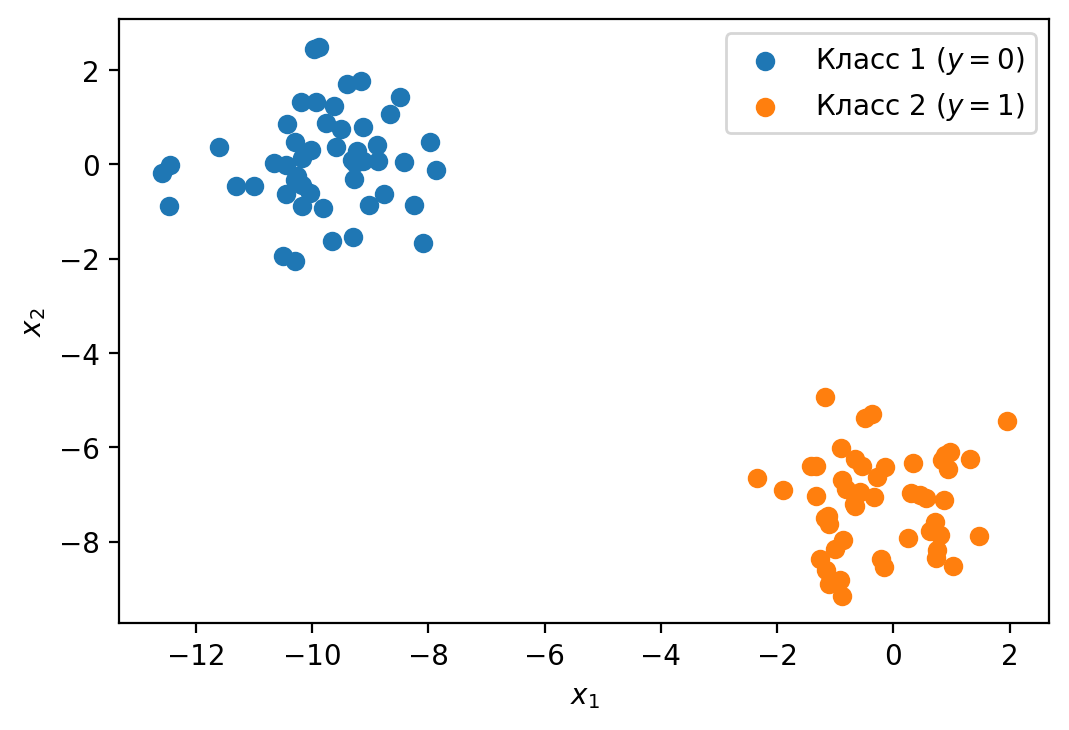

In [3]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Класс 1 ($y = 0$)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Класс 2 ($y = 1$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

Ниже представлена заготовка класса логистической регрессии. Реализуйте недостающие части.

In [0]:
class LogisticRegression:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self, learning_rate=0.1, max_iter=1000, verbose=False):
        # Learning rate for gradient descent
        self._lr = learning_rate
        # Maximum number of iterations for gradient descent
        self._max_iter = max_iter
        # Show verbose history
        self.verbose = verbose
        # How often to print validation info
        self._validation_freq = 50
        
        
    def fit(self, X, y):
        losses = []
        # Add extra dummy feature (x[-1] = 1) for bias
        X = self.__add_intercept(X)
        y = y.reshape(-1, 1)
        n_objects, n_features = X.shape
        self._weights = np.random.normal(size=(n_features, 1), scale=0.1)
        
        # Iterative gradient descent
        for i in range(self._max_iter):
            '''
            Compute probabilities, gradient, and update weights
            '''
            p = self.predict_proba(X)
            grad = np.dot(X.T, p-y, out=None)
            print(grad)
            self._weights = self._weights - (grad.dot(self._lr))
            
            # Compute probabilities after weights update
            p = self.predict_proba(X)
            
            # Clip values for numeric stability in logarithm
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            # Compute Negative log-likelihood loss 
            loss = self.__loss(y, p)
            losses.append(loss)

            # Compute accuracy
            acc = ''# your code here
                
            if self.verbose and i % self._validation_freq == 0:
                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

        return losses

        
    def predict(self, X, threshold=0.5):
        '''
        Predict class labels for samples in X.
        '''
        P = (self.__logit(X) >  threshold).astype(int)
        return P
    
    
    def predict_proba(self, X):
        '''
        Probability estimates.
        '''
        return self.__logit(X)
    
    
    def __add_intercept(self, X):
        return np.hstack([X, np.ones((len(X), 1))])
    
    def __loss(self, y, p):
        '''
        Compute negative log-likelihood loss
        '''
        return # your code here

    def __sigmoid(self, v):
        return 1/(1+np.exp(-v))

    def __logit(self, x):
      v = x.dot(self._weights)
      return self.__sigmoid(v)

Обучите модель на сгенерированных ранее данных.

In [27]:
clf = LogisticRegression(learning_rate=0.1, max_iter=100, verbose=True)
losses = clf.fit(X, y)

ValueError: ignored

Постройте график, показывающий зависимость значения функции потерь от номера итерации.

In [0]:
# your code here

Постройте график, показывающей форму границы решения (англ. decision boundary).

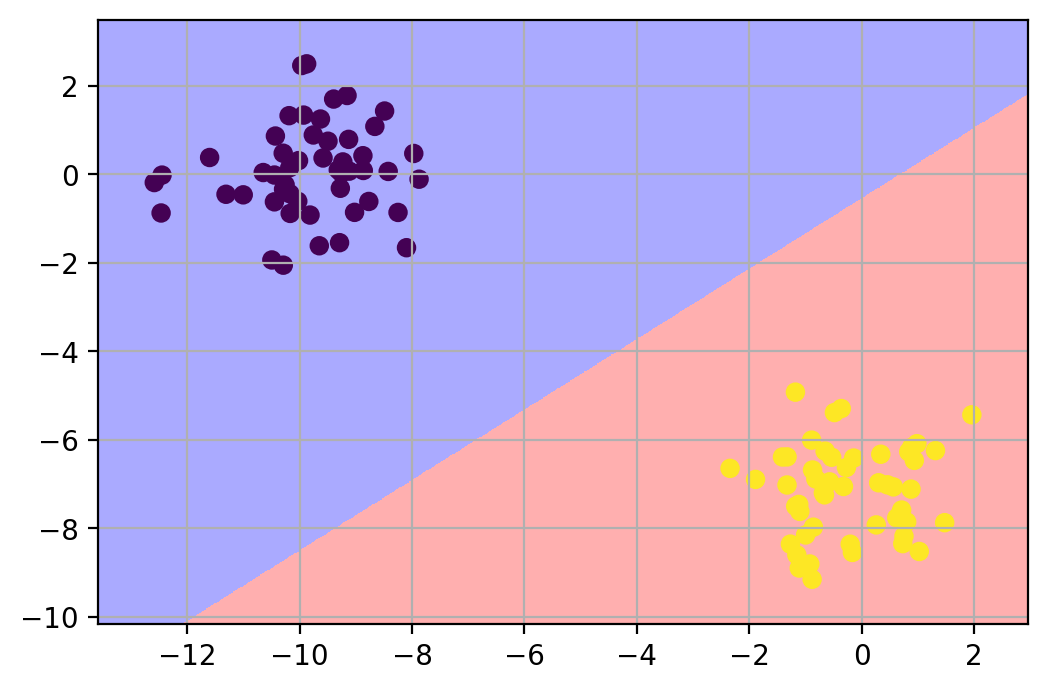

In [0]:
fig = plt.figure(dpi=200)
xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
plt.grid()
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

Выпишите уравнение границы решения. 

**Ответ:**

Постройте график получившейся прямой на диаграмме рассеяния.

In [0]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Класс 1 ($y = 0$)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Класс 2 ($y = 1$)')
# your code here
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

Постройте ROC-кривую для получившейся модели. Вычислите значение AUC.

In [0]:
def plot_roc_auc(fpr, tpr, roc_auc):
    plt.figure(dpi=200)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

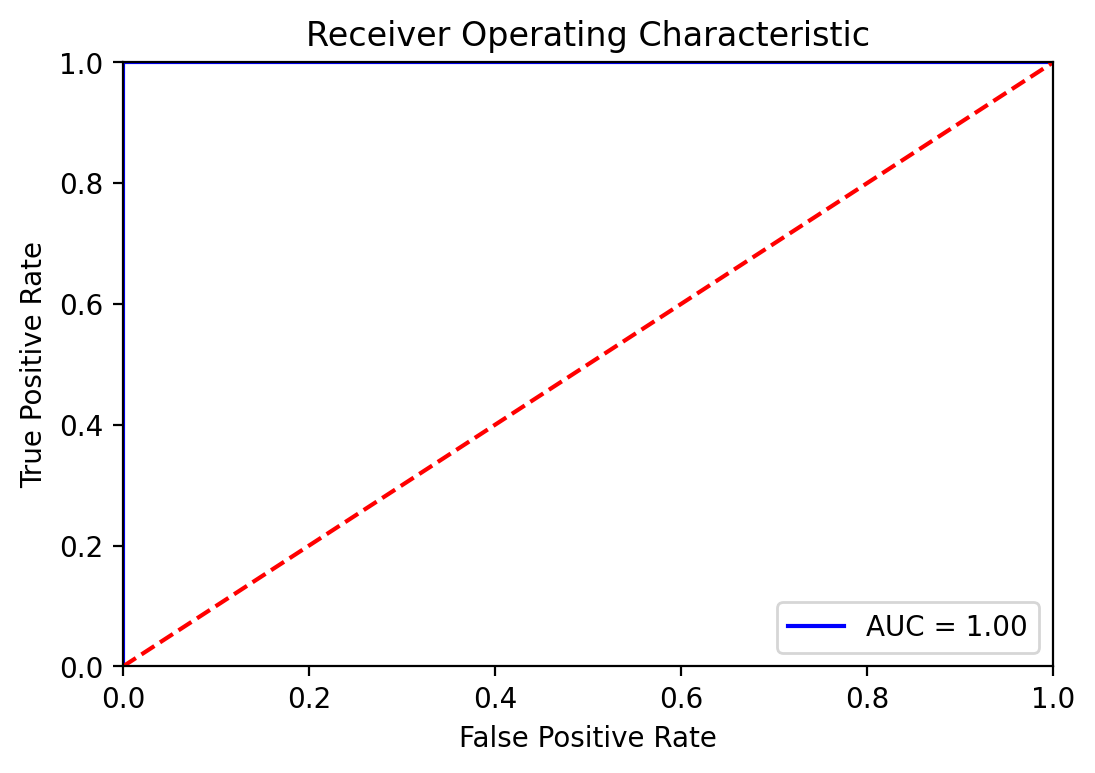

In [0]:
probs = clf.predict_proba(X)
fpr, tpr, threshold = metrics.roc_curve(y, probs)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

Как можно объяснить полученный вид кривой и значение AUC?

**Ответ:**

Постройте диаграмму рассеяния и обучите модель логистической регресси для данных, сгенерированных ниже.

In [0]:
X, y = make_blobs(n_samples=100, n_features=2, centers=[[1, 2], [2, 3]])

In [0]:
# your code here

In [0]:
# your code here

Реализуйте функции `roc_curve(y, probs)` и `auc(fpr, tpr)`. Первая функция по меткам классов `y` и вероятностям `probs`, выданным логистической регрессией, должна вычислять массывы значений TPR (True Positives Rate) и FPR (False Positives Rate) для разных значений порога (и возвращает полученные значения TPR, FPR и thresholds). Вторая функция должна вычислять значение AUC (Area Under Curve) для кривой, заданной точками `fpr` и `tpr`. При реализации нельзя использовать сторонние библиотеки (за исключением NumPy).

In [0]:
def roc_curve(y, probs):
    # your code here

def auc(fpr, tpr):
    # your code here

In [0]:
probs = clf.predict_proba(X)
fpr, tpr, threshold = roc_curve(y, probs)
roc_auc = auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

Проверьте правильность работы своих функций, сравнив полученную кривую и значение AUC, с аналогичными значеними, рассчитанными с помощью библиотеки `sklearn`.

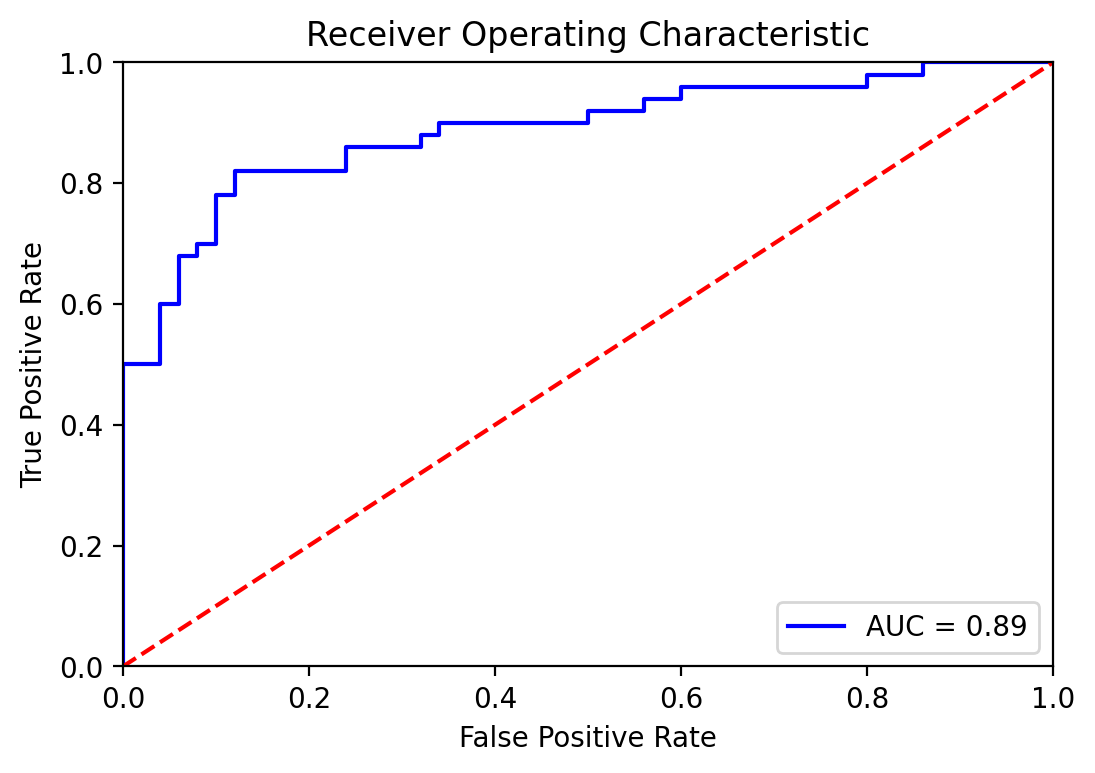

In [0]:
preds = clf.predict_proba(X)
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

## 2. Логистическая регрессия на реальных данных

Во второй части вам нужно построить модель логистической регрессии, позволяющую предсказать, есть ли у пациента диабет II типа, по набору результатов обследований. Для построения модели предлагается использовать данные [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database), которые содержат данные обследований 768 пациенток индийской народности Пима. В данных содержатся следующие показатели.


1. Число беременностей (Pregnancies).
2. Концентрация глюкозы в плазме через 2 часа после введения в пероральном глюкозотолерантном тесте (Glucose).
3. Диастолическое артериальное давление [мм рт. ст.] (BloodPressure).
4. Толщина кожной складки в районе трицепса [мм] (SkinThickness).
5. Концентрация инсулина в сыворотке крови [мкЕд/мл] (Insulin).
6. Индекс массы тела [вес в кг/(рост в м)^2] (BMI).
7. Функция, описывающая генетическую предрасположенность к диабету (DiabetesPedigreeFunction).
8. Возраст [годы] (Age).

Outcome -- страдает ли пациент сахарным диабетом. Если страдает Outcome = 1, в противном случае Outcome = 0.



In [0]:
df = pd.read_csv('http://edu.std-900.ist.mospolytech.ru/files/diabetes.csv')
print(df.shape)

(768, 9)


In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Разделите данные на обучающую и тестовую выборки в пропорции 70% на 30% соответственно с помощью функции [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Обратите внимание на параметр `stratify`.

In [0]:
X_train, X_test, y_train, y_test = # your code here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Проведите [стандартизацию](https://wiki.loginom.ru/articles/data-standartization.html) данных, чтобы привести признаки к одному масштабу. В дальнейшем это позволит сравнивать коэффициенты регрессии при разных признаках.

*Подсказка: среднее значение и стандартное отклонение нужно вычислять по обучающей выборке.*

In [0]:
X_train_normalized = # your code here
X_test_normalized = # your code here

Обучите на подготовленных данных модель логистической регрессии. Экспериментальным путём подберите оптимальное значение `learning_rate`.

In [0]:
# your code here

Постройте график, показывающий зависимость значения функции потерь от номера итерации.

In [0]:
# your code here

Вычислите значения accuracy, precision, recall для тестовой выборки. Можно воспользоваться функциями `accuracy_score`, `precision_score`, `recall_score` модуля [`sklearn.metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [0]:
# your code here

Постройте ROC-кривую и вычислите значение AUC.

In [0]:
# your code here

Один из способов определить оптимальное значение порога для классификации -- это [индекс Юдена](https://en.wikipedia.org/wiki/Youden%27s_J_statistic). Реализуйте функцию `youdens_j_threshold`, которая имеет 3 параметра: `fpr`,`tpr`,`thresholds` -- значения, возвращаемые функцией `roc_curve`, и возвращает оптимальное значение порога. 

Подсказка: можно использовать функцию `np.argmax`. Подробнее о индексе Юдена можно прочитать в [презентации](http://edu.std-900.ist.mospolytech.ru/presentations/logistic-regression).

In [0]:
def youdens_j_threshold(fpr,tpr,thresholds):
    # your code here

Используйте полученное в предыдущем задании значение порога в функции `predict`. Как изменятся значения accuracy, precision, recall при новом значении порога?

In [0]:
# your code here

Для диагностических тестов используются такие показатели как чувствительность (англ. sensitivity) -- вероятность того, что тест
окажется позитивным при наличии признака $\left (\frac{TP}{TP+FN} \right )$, и специфичность (англ. specificity) -- вероятность того, что тест окажется негативным при отсутствии признака $\left (\frac{TN}{TN+FP} \right )$. Вычислите [чувствительность и специфичность](https://ru.wikipedia.org/wiki/%D0%A7%D1%83%D0%B2%D1%81%D1%82%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B8_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D1%84%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C) для обученной логистической регрессии. Какое значение порога является более предпочтительным с точки зрения этих показателей: значение по умолчанию 0,5 или значение, полученное при помощи индекса Юдена? 

In [0]:
# your code here

**Ответ:**

Выведите полученные значения коэффициентов регрессии для каждого признака.

In [0]:
# your code here

In [0]:
fig = plt.figure(dpi=200)
plt.bar(df.columns[:-1],clf._weights[:-1].squeeze())
plt.xticks(rotation=90)
plt.show()

На основе анализа полученных данных определите, какие признаки являются наиболее значимыми (информативными) для диагностирования у пациента диабета II типа.

**Ответ:**

### Полезные материалы
1. [Материалы по логистической регрессии курса по машинному обучению от МФТИ](https://github.com/ml-mipt/ml-mipt/tree/master/week0_03_logistic)
2. [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
3. [Обсуждение методов вычисления оптимального порога для ROC-кривой на StackOverflow](https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python)